# Python Geometric Start up
*@author: Tang wuguo*
*@email: tangwg@csu.edu.cn*

In [8]:
import torch
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [43]:
def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:,0], h[:,1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                        f'Trainning accuracy: {accuracy["train"]*100:.2f} \n'
                        f'Validation accuracy: {accuracy["val"]*100:.2f}'), fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False, node_color=color, cmap="Set2")
    plt.show()


## Data in Graph

In [45]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

In [48]:
edge_index = torch.tensor([
    [0, 1],
    [1, 0],
    [1, 2],
    [2, 1]
], dtype=torch.long)

x = torch.tensor([[-1],[0],[1]], dtype=torch.float)

# the edge_index must in (2, num_edges)
# Or, you should use the t() to transpose it
# x: indicts the node feat mat (num_nodes, num_node_features)
data = Data(x=x, edge_index=edge_index.t().contiguous())
data

Data(x=[3, 1], edge_index=[2, 4])

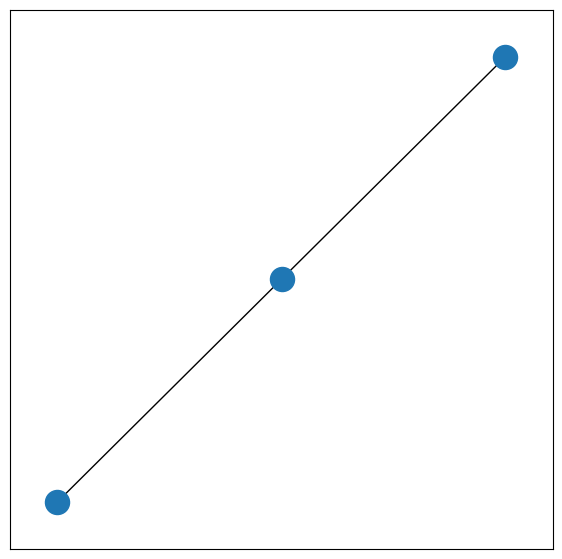

In [49]:
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [51]:
print(data.keys)
print(data['x'])
for k, item in data:
    print(f'{k}:{item}')


['x', 'edge_index']
tensor([[-1.],
        [ 0.],
        [ 1.]])
x:tensor([[-1.],
        [ 0.],
        [ 1.]])
edge_index:tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])


## Datasets

In [60]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='./dataset', name='ENZYMES')

In [62]:
data = dataset[0]

In [64]:
data

Data(edge_index=[2, 168], x=[37, 3], y=[1])

## MiniBatch

In [77]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader
from torch_geometric.utils import scatter

dataset = TUDataset(root='./dataset', name='ENZYMES')
loader = DataLoader(dataset, batch_size=32, shuffle=True)

for batch in loader:
    print(batch)
    print(batch.size())
    print(batch.num_graphs)
    # a column vector, maps each node to its respective graph
    print(batch.batch)
    # mean all the nodes in the same graph
    x = scatter(batch.x, batch.batch, dim=0, reduce='mean')
    print(x.size())
    break

DataBatch(edge_index=[2, 3280], x=[849, 3], y=[32], batch=[849], ptr=[33])
(849, 849)
32
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,

## Data Transforms
Transformed *Data* obj to a new *Data* obj
Transform can be chained